In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [2]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

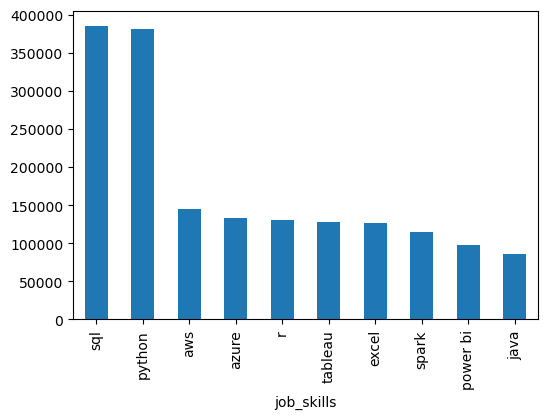

In [3]:
# Visualizing the top 10 skills for all jobs
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar', figsize=(6,4))


In [4]:
# We wanna group the skills by the jobs
# First method by using pivot_table
piv = df_exploded.pivot_table(index=['job_title_short', 'job_skills'], 
                                       aggfunc='size')


In [18]:
# Second method, by using a group_by
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [36]:
skills_tab = skills_count.reset_index(name='skills_count')
# Ici j'ai utilisé la methode reset_index() parce que ca m'a permis de transformer skills_count(qui 
# etait une serie), en dataframe. J'aurais pu utiliser pd.DataFrame() mais le résultat n'est pas celui que je desire
# J'ai utilisé name = skill_count à cause du 0 qui vient au niveau du titre

skills_tab = skills_tab.sort_values(by='skills_count', ascending=False)

job_title ='Data Analyst'
nb_skills=10
skills_tab = skills_tab[skills_tab['job_title_short']==job_title].head(nb_skills)
skills_tab

,job_title_short,job_skills,skills_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


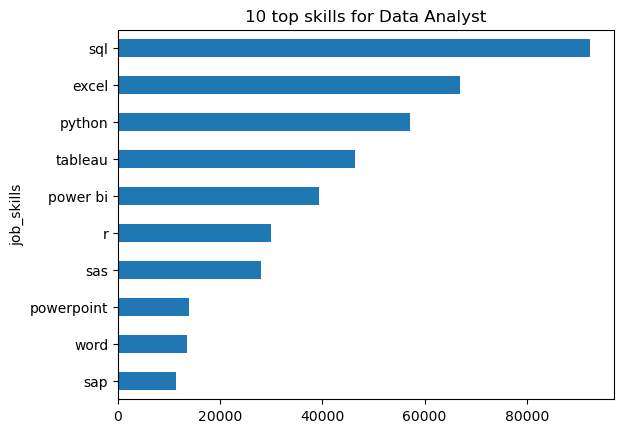

In [40]:
# Plotting

skills_tab.plot(kind='barh', x='job_skills', y='skills_count')
# Pour inverser l'axe y et obtenir les barres de la plus longue à la plus courte en partant du haut 
plt.gca().invert_yaxis()
plt.title(f'{nb_skills} top skills for {job_title}')
# Enlever la 
plt.legend().set_visible(False)
plt.show()